In [1]:
from utils import *
from sklearn.metrics import adjusted_rand_score
import numpy as np


/home/jocl/.conda/envs/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# prune_percent = 0.50

for prune_percent in [0.25, 0.5]:
    clusterings = []
    n_clusterings = 100
    head_to_int = {}
    i = 0
    for layer in range(40):
        for head in range(40):
            head_to_int[(layer,head)] = i
            i+=1
    for idx in range(100):
        path = f"pruning_logs/opt-13b/imbalanced_amazon/hellaswag/cosine/{prune_percent}/{idx}/pruning_log.txt"
        clusters = load_clusters_from_log(path)
        clustering = list(range(1600)) # Default to be in own cluster
        for key, cluster in clusters.items():
            for head in cluster:
                # Change to cluster id of head to keep
                clustering[head_to_int[head]] = head_to_int[key]
        clusterings.append(clustering)    
    ari_matrix = np.zeros((n_clusterings, n_clusterings))
    for i in range(n_clusterings):
        for j in range(i+1, n_clusterings):
            ari = adjusted_rand_score(clusterings[i], clusterings[j])
            ari_matrix[i, j] = ari
            ari_matrix[j, i] = ari
    average_ari = np.mean(ari_matrix[ari_matrix != 0])  # ignoring diagonal zeros
    print(f"Average ARI across all pairs for prune percent {prune_percent}: {average_ari}")

Average ARI across all pairs for prune percent 0.25: 0.6255100124006872
Average ARI across all pairs for prune percent 0.5: 0.6398216415554288


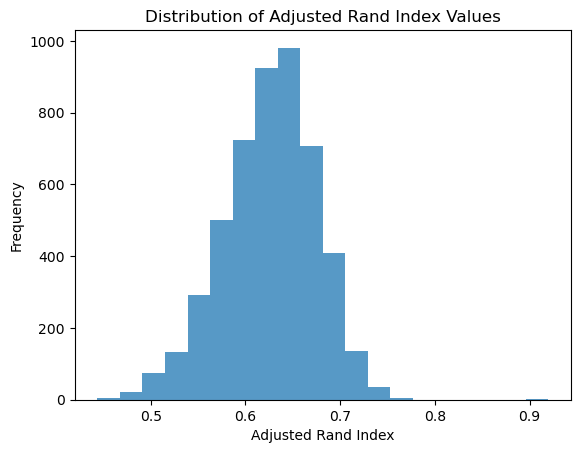

In [5]:
import matplotlib.pyplot as plt

# Flatten the matrix excluding diagonal and plot histogram
plt.hist(ari_matrix[np.triu_indices(n_clusterings, 1)], bins=20, alpha=0.75)
plt.title('Distribution of Adjusted Rand Index Values')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Frequency')
plt.show()

In [3]:
clusterings[0]

defaultdict(list,
            {(0, 1): [(0, 24), (0, 1)],
             (0, 20): [(0, 22), (0, 20)],
             (1, 17): [(1, 0),
              (1, 2),
              (1, 3),
              (1, 5),
              (1, 6),
              (1, 7),
              (1, 9),
              (1, 12),
              (1, 13),
              (1, 14),
              (1, 16),
              (1, 19),
              (1, 20),
              (1, 22),
              (1, 23),
              (1, 24),
              (1, 25),
              (1, 26),
              (1, 30),
              (1, 31),
              (1, 32),
              (1, 33),
              (1, 34),
              (1, 35),
              (1, 36),
              (1, 38),
              (1, 39),
              (1, 17)],
             (1, 4): [(1, 10), (1, 11), (1, 4)],
             (1, 28): [(1, 8), (1, 29), (1, 28)],
             (1, 18): [(1, 37), (1, 18)],
             (2, 12): [(2, 0),
              (2, 1),
              (2, 6),
              (2, 8),
              (